In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
# Convert data to dataframes
lung_df1 = pd.read_csv(os.path.join("Resources", "CDC_Cancer1.csv"))
lung_df2 = pd.read_csv(os.path.join("Resources", "CDC_Cancer2.csv"))
county_df = pd.read_csv(os.path.join("Resources", "CDC_Cancer_by_County.csv"))

# Combine lung dataframes into single dataframe
lung_df = lung_df1.append(lung_df2, ignore_index=True)

# Delete unnecessary columns
lung_df = lung_df.drop(["Notes", "State Code", "Year Code", "Sex Code", "Race Code", "Age Group Code"], axis=1)
county_df = county_df.drop(["Notes", "County Code", "Year Code"], axis =1)

In [3]:
# Check to see if there are any null values in dataframe
lung_df.isnull().sum()
county_df.isnull().sum()

County        81
Year          81
Deaths        81
Population    81
Crude Rate    81
dtype: int64

In [4]:
# Drop rows that have nothing but null values
lung_df = lung_df.dropna(how="all")
county_df = county_df.dropna(how="all")
# Verify there are no null values left
lung_df.isnull().sum()
county_df.isnull().sum()

County        0
Year          0
Deaths        0
Population    0
Crude Rate    0
dtype: int64

In [5]:
# For county dataframe, remove unreliable rows and verify no more junk rows
county_df = county_df[county_df["Crude Rate"] != "Unreliable"]
county_df = county_df[county_df["Deaths"] != "Missing"]
county_df.head()

,County,Year,Deaths,Population,Crude Rate
3,"Abbeville County, SC",2014.0,24,24965,96.1
4,"Abbeville County, SC",2013.0,23,25007,92
5,"Abbeville County, SC",2016.0,22,24872,88.5
6,"Acadia Parish, LA",2015.0,52,62577,83.1
7,"Acadia Parish, LA",2013.0,51,62204,82


In [6]:
# Cast "Year", "Deaths", and "Population" columns as integers; Crude Rate as float
lung_df["Year"] = lung_df["Year"].astype(int)
lung_df["Deaths"] = lung_df["Deaths"].astype(int)
lung_df["Population"] = lung_df["Population"].astype(int)
lung_df.head()

county_df["Year"] = county_df["Year"].astype(int)
county_df["Deaths"] = county_df["Deaths"].astype(int)
county_df["Population"] = county_df["Population"].astype(int)
county_df["Crude Rate"] = county_df["Crude Rate"].astype(float)
lung_df.head()

,State,Year,Sex,Race,Age Group,Deaths,Population,Crude Rate
0,Alabama,2006,Female,American Indian or Alaska Native,< 1 year,0,131,0.0
1,Alabama,2006,Female,American Indian or Alaska Native,1-4 years,0,788,0.0
2,Alabama,2006,Female,American Indian or Alaska Native,5-9 years,0,1093,0.0
3,Alabama,2006,Female,American Indian or Alaska Native,10-14 years,0,1237,0.0
4,Alabama,2006,Female,American Indian or Alaska Native,15-19 years,0,1305,0.0


In [7]:
# Create series of crude rate of mortality by lung cancer in 2015 by state

states_lung=lung_df[lung_df.Year ==2015].groupby(["State"]).agg({"Deaths":"sum"})
pop_lung=lung_df[lung_df.Year ==2015].groupby(["State"]).agg({"Population":"sum"})
states_crude = states_lung["Deaths"]*100000/pop_lung["Population"]

states_crude.to_csv(os.path.join('Output','stateCrudeRates.csv'))


C:\Users\onmik\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


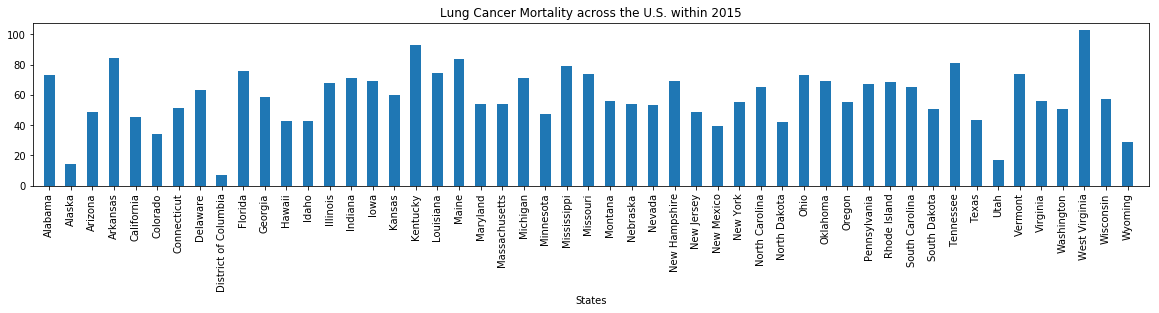

<Figure size 432x288 with 0 Axes>

In [8]:
#set x axis and tick locations
barlabels = states_crude.index.tolist()
x_axis = np.arange(len(barlabels))
tick_locations = [value for value in x_axis]

#plot
states_crude.plot(kind="bar", figsize=(20,3))

#set x and y limits
plt.xlim(-0.75, len(x_axis))

plt.title("Lung Cancer Mortality across the U.S. within 2015")
plt.xlabel("States")
plt.show("Total of Lung Cancer Deaths")
plt.tight_layout()
plt.show()